<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Price-Prediction/blob/main/Fully_Convolutional_Networks_(FCNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Fully Convolutional Networks (FCNs)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, GlobalAveragePooling1D, Dense



In [2]:

# Load the dataset
file_path = '/content/AMZN.csv'
data = pd.read_csv(file_path)


In [3]:

# Display the first few rows of the dataset
data.head()

# Select the 'Close' column
close_prices = data['Close'].values


In [4]:

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))


In [5]:

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(close_prices_scaled, seq_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for Conv1D
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [6]:
# Define the FCN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 59, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 58, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,513 (33.25 KB)

 Trainable params: 8,513 (33.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.5577e-04 - val_loss: 2.3480e-04
Epoch 2/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9509e-05 - val_loss: 3.2223e-04
Epoch 3/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0342e-05 - val_loss: 2.4649e-04
Epoch 4/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0823e-05 - val_loss: 2.4705e-04
Epoch 5/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9022e-05 - val_loss: 2.5456e-04
Epoch 6/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1282e-05 - val_loss: 2.3214e-04
Epoch 7/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9982e-05 - val_loss: 3.4044e-04
Epoch 8/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0320e-05 - val_loss: 2.2940e-04
Epoch 9/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.0050e-05 - val_loss: 2.3616e-04
Epoch 10/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1452e-05 - val_loss: 2.3240e-04
Epoch 11/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss

In [9]:

# Evaluate the model on the test set
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_reshaped)

# Inverse transform the predictions and true values to get the original scale
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034
Test Loss: 0.00487841572612524
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


RMSE: 13.026265507281794
MAE: 10.454832657512087
MAPE: 8.633355099632995


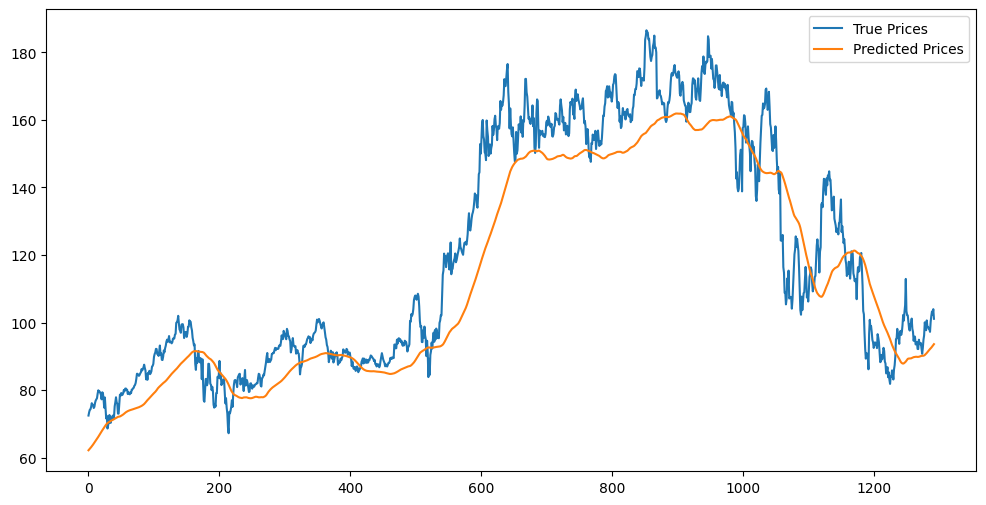

In [10]:

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the predictions against the true values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()